In [13]:
import cygno as cy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
runInfo=cy.read_cygno_logbook(sql=True)
image = np.zeros((2304, 2304), dtype=np.int64)
x_var = []
y_var = []
data_to_save = {}
run=47222
run=58114
force = True
if runInfo[runInfo.run_number==run].source_type.values[0]==0 or force:
    run_name = '/jupyter-workspace/cloud-storage/cygno-analysis/pkl/'+'reco_run{0:05d}_3D.pkl.gz'.format(run)
    dfall=pd.read_pickle(run_name, compression={'method': 'gzip'})
    cut = dfall.sc_integral/dfall.sc_nhits
    for i, Sc in enumerate(dfall.nSc):
        for j, val in enumerate(cut[i]):
            if val>20 and (dfall.sc_nhits[i][j]>1000) or force:
                if j == len(cut[i])-1:
                    jmax = int(len(dfall.redpix_ix[i]))
                else:
                    jmax = int(dfall.sc_redpixIdx[i][j+1])
                #print (dfall.sc_nhits[i][j])
                image[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                      dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
                image[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                      dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
                dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]
                x_var.append(int(dfall.sc_xmean[i][j]))
                y_var.append(int(dfall.sc_ymean[i][j]))
                
data_to_save['image']=[image]
data_to_save['x_var']=[x_var]
data_to_save['y_var']=[y_var]
dftmp = pd.DataFrame(data_to_save, index=[0])

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [14]:
dfall.columns

Index(['run', 'event', 'pedestal_run', 'cmos_integral', 'cmos_mean',
       'cmos_rms', 't_DBSCAN', 't_variables', 'lp_len', 't_pedsub',
       't_saturation', 't_zerosup', 't_xycut', 't_rebin', 't_medianfilter',
       't_noisered', 'nSc', 'sc_size', 'sc_nhits', 'sc_integral',
       'sc_corrintegral', 'sc_rms', 'sc_energy', 'sc_pathlength',
       'sc_redpixIdx', 'nRedpix', 'redpix_ix', 'redpix_iy', 'redpix_iz',
       'sc_theta', 'sc_length', 'sc_width', 'sc_longrms', 'sc_latrms',
       'sc_lfullrms', 'sc_tfullrms', 'sc_lp0amplitude', 'sc_lp0prominence',
       'sc_lp0fwhm', 'sc_lp0mean', 'sc_tp0fwhm', 'sc_xmean', 'sc_ymean',
       'sc_xmax', 'sc_xmin', 'sc_ymax', 'sc_ymin', 'sc_pearson',
       'sc_tgaussamp', 'sc_tgaussmean', 'sc_tgausssigma', 'sc_tchi2',
       'sc_tstatus', 'sc_lgaussamp', 'sc_lgaussmean', 'sc_lgausssigma',
       'sc_lchi2', 'sc_lstatus', 'Lime_pressure', 'Atm_pressure',
       'Lime_temperature', 'Atm_temperature', 'Humidity', 'Mixture_Density'],
      dtype

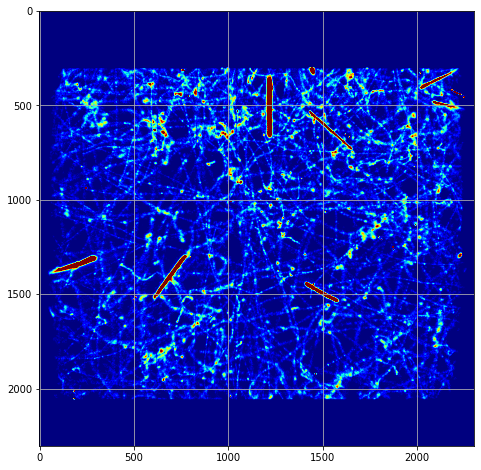

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(image, vmin=0, vmax=100, cmap='jet')
plt.grid(None)
plt.show()

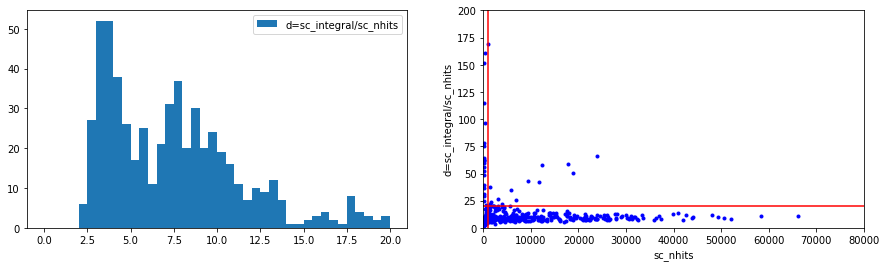

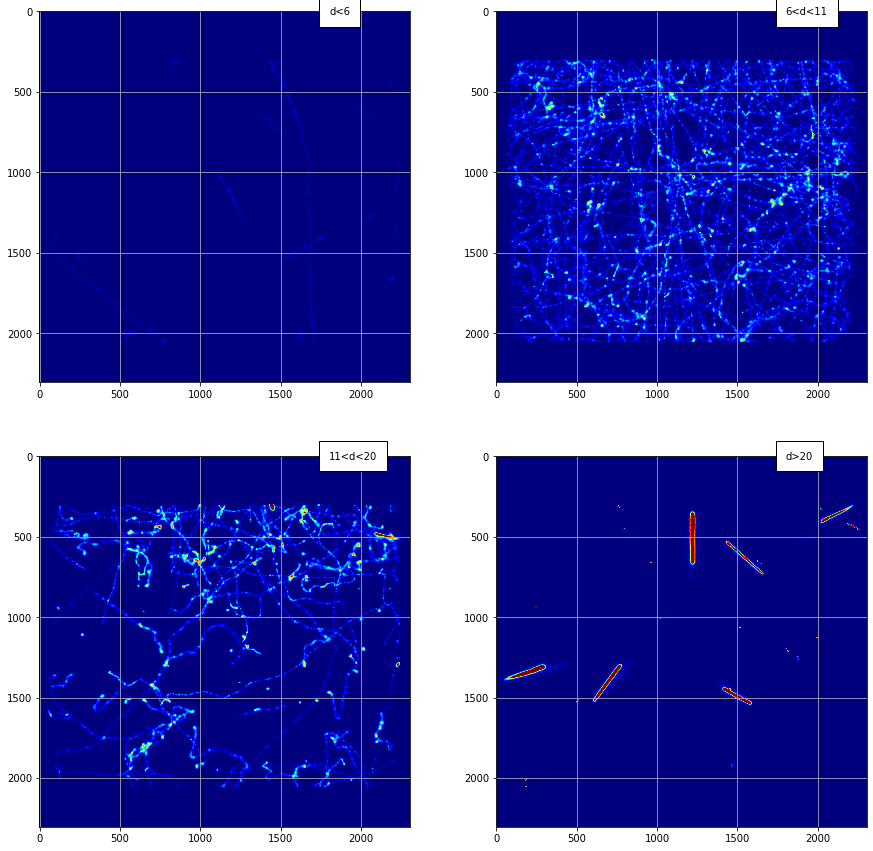

a 39 32.778072 169.40942
a 78 159.50908 50.83173
a 210 117.598785 58.797726
a 283 24.282713 60.06646
a 305 145.19975 57.897484
a 449 80.950905 42.068718
a 459 190.4224 65.8681
a 481 88.284615 43.508686
a 501 23.22144 114.459595
m 211 0.11769937 5.6658025
m 511 0.05019591 5.7587194
9 2 276.08


In [24]:
def m_rate(cut, length, dfall, dcut=6, lmin=1500):
    npar = 0
    for i in range(len(cut)):
        npar +=len(cut[i][(cut[i]<dcut) & (length[i]>lmin)])
        if len(cut[i][(cut[i]<dcut) & (length[i]>lmin)])>0:
            print("m", i,np.hstack(dfall.sc_width/dfall.sc_length)[i], cut[i])
    return npar

def a_rate(cut, length, dfall, dcut=40, lmin=50):
    npar = 0
    for i in range(len(cut)):
        npar +=len(cut[i][(cut[i]>dcut) & (length[i]>lmin)])
        if len(cut[i][(cut[i]>dcut) & (length[i]>lmin)])>0:
            print("a", i, np.hstack(dfall.sc_width)[i], cut[i])
    return npar

def run_live_time(sql_Log, run):
    from datetime import datetime
    date = str(sql_Log[sql_Log.run_number==run].start_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    start = (utc_time - datetime(1970, 1, 1)).total_seconds()
    date = str(sql_Log[sql_Log.run_number==run].stop_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    stop = (utc_time - datetime(1970, 1, 1)).total_seconds()
    return (stop-start)*0.58

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(np.hstack(dfall.sc_integral/dfall.sc_nhits), bins=40, range=(0, 20), label='d=sc_integral/sc_nhits')
ax[0].legend()
ax[1].plot(np.hstack(dfall.sc_nhits), np.hstack(dfall.sc_integral/dfall.sc_nhits), 'b.')
ax[1].axhline(20, color='r')
ax[1].axvline(1000, color='r')
ax[1].set_ylim(0,200)
ax[1].set_xlim(0,80000)
ax[1].set_xlabel('sc_nhits')
ax[1].set_ylabel('d=sc_integral/sc_nhits')
plt.show()
fig, ax = plt.subplots(2,2, figsize=(15,15))
imageA = np.zeros((2304, 2304), dtype=np.int64)
imageB = np.zeros((2304, 2304), dtype=np.int64)
imageC = np.zeros((2304, 2304), dtype=np.int64)
imageD = np.zeros((2304, 2304), dtype=np.int64)
cut = dfall.sc_integral/dfall.sc_nhits

for i, Sc in enumerate(dfall.nSc):
    for j, val in enumerate(cut[i]):
        if j == len(cut[i])-1:
            jmax = int(len(dfall.redpix_ix[i]))
        else:
            jmax = int(dfall.sc_redpixIdx[i][j+1])
        if val>=40 : #and (dfall.sc_nhits[i][j]>1000)
            if j == len(cut[i])-1:
                jmax = int(len(dfall.redpix_ix[i]))
            else:
                jmax = int(dfall.sc_redpixIdx[i][j+1])
            # print (dfall.sc_nhits[i][j])
            imageD[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageD[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]
        elif val>=11 and val<40:
            imageC[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageC[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]
        elif val>=6 and val<11:
            imageB[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageB[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]   
        elif val<6:
            imageA[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageA[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]  
ax[0,0].imshow(imageA, vmin=0, vmax=100, cmap='jet', )
ax[0,1].imshow(imageB, vmin=0, vmax=100, cmap='jet', )
ax[1,0].imshow(imageC, vmin=0, vmax=100, cmap='jet', )
ax[1,1].imshow(imageD, vmin=0, vmax=100, cmap='jet', )
ax[0,0].text(1800, 20, 'd<6', bbox={'facecolor': 'white', 'pad': 10})
ax[0,1].text(1800, 20, '6<d<11', bbox={'facecolor': 'white', 'pad': 10})
ax[1,0].text(1800, 20, '11<d<20', bbox={'facecolor': 'white', 'pad': 10})
ax[1,1].text(1800, 20, 'd>20', bbox={'facecolor': 'white', 'pad': 10})
ax[0,0].grid(None)
ax[0,1].grid(None)
ax[1,0].grid(None)
ax[1,1].grid(None)
plt.show()

alpha = a_rate(np.hstack(dfall.sc_integral/dfall.sc_nhits),np.hstack(dfall.sc_length), dfall, dcut=40, lmin=50)
mu = m_rate(np.hstack(dfall.sc_integral/dfall.sc_nhits),np.hstack(dfall.sc_length), dfall, dcut=6, lmin=500)
ltime = run_live_time(runInfo, run)
print(alpha, mu,ltime )

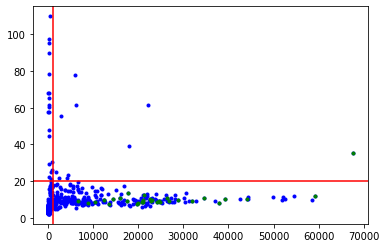

In [41]:
x = np.hstack(dfall.sc_nhits)
y = np.hstack(dfall.sc_integral/dfall.sc_nhits)
plt.plot(x, y, 'b.')
cut = np.hstack(dfall.sc_length)
plt.plot(x[cut>50], y[cut>50], 'g.')
plt.axhline(20, color='r')
plt.axvline(1000, color='r')
plt.show()

0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


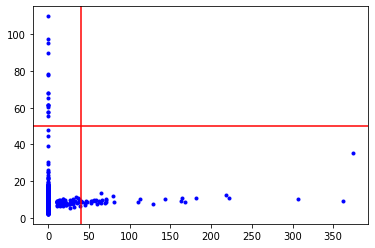

In [42]:
def alpha_rate(cut,length, xmax=40):
#    cut = dfall.sc_integral/dfall.sc_nhits
    nalpha = 0
    for i in range(len(cut)):
#        nalpha +=len(cut[i][(cut[i]>40) & (dfall.sc_length[i]>50)])
        nalpha +=len(cut[i][(cut[i]>40) & (length[i]>50)])
    return nalpha

x = np.hstack(dfall.sc_length)
y = np.hstack(dfall.sc_integral/dfall.sc_nhits)
print(alpha_rate(y,x, xmax=40))
print(x[y>40])
plt.plot(x, y, 'b.')
plt.axhline(50, color='r')
plt.axvline(40, color='r')
plt.show()

In [ ]:
from IPython import display
import time
bins = 100
a = np.histogram(np.random.normal(bins/2, bins/20, bins), bins)[0]
x = np.array([x for x in range(bins)])
for i in range(100):
    a = a +np.histogram(np.random.normal(bins/2, bins/20, bins), bins)[0]
    plt.figure(figsize=(4,4))
    plt.bar(x, a, width=1, label = str(i))
    plt.legend()

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

In [60]:
class myHist(object):
    import numpy as np
    def __init__(self, value, **kwargs):
        self.value  = value
        self.kwargs = kwargs
        self.run = np.histogram(value, **kwargs)[0]
        print(self.run)
        
    def fill(self, value):
        self.run = self.run+np.histogram(value, **self.kwargs)[0]
        return self.run
    
def alpha_rate(cut, mlen=50):
    nalpha = 0
    for i in range(len(cut)):
        nalpha +=len(cut[i][(cut[i]>40) & (length[i]>mlen)])
    return nalpha

def mu_rate(cut, mlen=1500):
    nmu = 0
    for i in range(len(cut)):
        nmu +=len(cut[i][(cut[i]<=6) & (length[i]>mlen)])
    return nmu

def start2epoch(sql_Log, run):
    from datetime import datetime
    date = str(sql_Log[sql_Log.run_number==run].start_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    epoch_time = (utc_time - datetime(1970, 1, 1)).total_seconds()
    return epoch_time

def run_live_time(sql_Log, run):
    from datetime import datetime
    date = str(sql_Log[sql_Log.run_number==run].start_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    start = (utc_time - datetime(1970, 1, 1)).total_seconds()
    date = str(sql_Log[sql_Log.run_number==run].stop_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    stop = (utc_time - datetime(1970, 1, 1)).total_seconds()
    return stop-start
    
def my_anal(start_run, end_run,verbose=False):
    import numpy as np
    import pandas as pd
    import cygno as cy
    import os
    from datetime import datetime
    try:
        runInfo=cy.read_cygno_logbook(sql=True,verbose=verbose)
        if verbose: print(runInfo)
    except Exception as e:
        print('DB ERROR >>> {}'.format(e))
    
    #runSel = runInfo.loc[runInfo.run_description.str.contains('Stability')]
    runSel = runInfo.loc[runInfo.run_description == 'Standard']
    #runSel = runInfo
    envVar = ['nSc','Lime_pressure', 'Atm_pressure', 'Lime_temperature', 'Atm_temperature', 'Humidity', 'Mixture_Density']
    df = pd.DataFrame(columns = ['run','epoch','live_time', 'alpha', 'mu']+envVar)
    
    for i, run in enumerate(runSel[(runSel.run_number>=start_run) & 
                                   (runSel.run_number<=end_run)].run_number):

        if (runSel[runSel.run_number==run].online_reco_status.values[0]==1 and \
           runSel[runSel.run_number==run].pedestal_run.values[0]==0) and \
            runInfo[runInfo.run_number==run].source_type.values[0]==0:
            try:
                print("analyzing run: ",run, str(runSel[runSel.run_number==run].run_description.values))
                run_name = '/jupyter-workspace/cloud-storage/cygno-analysis/pkl/'+'reco_run{0:05d}_3D.pkl.gz'.format(run)
                dfall=pd.read_pickle(run_name, compression={'method': 'gzip'})
                ## data to save
                alpha = alpha_rate(np.array(dfall["sc_integral"])/np.array(dfall["sc_nhits"]),np.array(dfall["sc_length"]))
                mu = mu_rate(np.array(dfall["sc_integral"])/np.array(dfall["sc_nhits"]),np.array(dfall["sc_length"]))
                # humidity = (np.hstack(dfall["Humidity"])).mean()
                live_time=run_live_time(runSel, run)
                # add env variables
                value = []
                for j, name in enumerate(envVar):
                    value.append((np.hstack(dfall[name])).mean())
                ## save data 
                epoch = start2epoch(runSel, run)
                df.loc[i] = [run, epoch, live_time ,alpha, mu]+value

            except Exception as e:
                print("ERROR>>> ", e)
            print(run, epoch, live_time ,alpha, mu)
    
    print("DONE")
    df.to_pickle('/jupyter-workspace/shared/mazzitel/df_'+str(start_run)\
             +'_'+str(end_run)+'.pkl')
    return df

# dataset piacentini
# start_run = 40919; end_run   = 42848     # december runs
# df = my_anal(start_run, end_run, verbose = False)

# start_run = 43886; end_run   = 45213     # 15 Jan -> 23 Jan 
# df = my_anal(start_run, end_run, verbose = False)

# start_run = 45252; end_run   = 46635     # 24 Jan -> 02 Feb
# df = my_anal(start_run, end_run, verbose = False)

# start_run = 46803; end_run   = 47023     # 05 Feb -> 06 Feb
# df = my_anal(start_run, end_run, verbose = False)

# start_run = 47209; end_run   = 47981     # 10 Feb -> 15 Feb
# df = my_anal(start_run, end_run, verbose = False)

# start_run = 48055; end_run   = 50891     # 15 Feb -> 05 Mar
# df = my_anal(start_run, end_run, verbose = False)

# datast pinci
start_run = 40919; end_run   = 42848 # 04/12-14/12
df = my_anal(start_run, end_run, verbose = False)
start_run = 43886; end_run   = 45213 # 15/01-23/01
df = my_anal(start_run, end_run, verbose = False)
start_run = 45259; end_run   = 46628 # 24/01-02/02
df = my_anal(start_run, end_run, verbose = False)
start_run = 46803; end_run   = 47023 # 05/02-06/02
df = my_anal(start_run, end_run, verbose = False)
start_run = 47209; end_run   = 47981 # 10/02-15/02
df = my_anal(start_run, end_run, verbose = False)
start_run = 48055; end_run   = 50891 # 15/02-05/03
df = my_anal(start_run, end_run, verbose = False)
start_run = 52664; end_run   = 52808 # 17/03-18/03
df = my_anal(start_run, end_run, verbose = False)
start_run = 53110; end_run   = 53502 # 23/03-26/03
df = my_anal(start_run, end_run, verbose = False)
start_run = 53707; end_run   = 54403 # 29/03-02/04
df = my_anal(start_run, end_run, verbose = False)
start_run = 54503; end_run   = 55093 # 04/04-08/04
df = my_anal(start_run, end_run, verbose = False)


/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  40920 ['Standard']
40920 1701685606.0 524.0 31 3
analyzing run:  40921 ['Standard']
40921 1701686134.0 507.0 36 1
analyzing run:  40923 ['Standard']
40923 1701686894.0 501.0 38 1
analyzing run:  40924 ['Standard']
40924 1701687401.0 546.0 33 2
analyzing run:  40925 ['Standard']
40925 1701687951.0 487.0 38 2
analyzing run:  40926 ['Standard']
40926 1701688442.0 544.0 40 1
analyzing run:  40927 ['Standard']
40927 1701688990.0 491.0 41 1
analyzing run:  40928 ['Standard']
40928 1701689487.0 514.0 28 3
analyzing run:  40930 ['Standard']
40930 1701690221.0 494.0 24 1
analyzing run:  40931 ['Standard']
40931 1701690718.0 513.0 28 0
analyzing run:  40932 ['Standard']
40932 1701691236.0 573.0 31 4
analyzing run:  40933 ['Standard']
40933 1701691813.0 497.0 34 1
analyzing run:  40934 ['Standard']
40934 1701692313.0 533.0 27 3
analyzing run:  40935 ['Standard']
40935 1701692851.0 507.0 30 1
analyzing run:  40937 ['Standard']
40937 1701693582.0 473.0 35 4
analyzing run:  40938 ['S

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  43887 ['Standard']
43887 1705310043.0 620.0 11 0
analyzing run:  43888 ['Standard']
43888 1705310667.0 544.0 5 0
analyzing run:  43889 ['Standard']
43889 1705311215.0 612.0 9 0
analyzing run:  43890 ['Standard']
43890 1705311833.0 595.0 12 0
analyzing run:  43891 ['Standard']
43891 1705312431.0 613.0 7 0
analyzing run:  43892 ['Standard']
43892 1705313049.0 567.0 6 0
analyzing run:  43894 ['Standard']
43894 1705313840.0 598.0 9 0
analyzing run:  43895 ['Standard']
43895 1705314442.0 569.0 15 0
analyzing run:  43896 ['Standard']
43896 1705315014.0 536.0 12 1
analyzing run:  43897 ['Standard']
43897 1705315553.0 591.0 5 1
analyzing run:  43898 ['Standard']
43898 1705316151.0 616.0 14 0
analyzing run:  43899 ['Standard']
43899 1705316771.0 584.0 6 0
analyzing run:  43901 ['Standard']
43901 1705317574.0 551.0 10 0
analyzing run:  43902 ['Standard']
43902 1705318132.0 548.0 10 0
analyzing run:  43903 ['Standard']
43903 1705318684.0 584.0 13 0
analyzing run:  43904 ['Standard

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  45260 ['Standard']
45260 1706093761.0 544.0 3 1
analyzing run:  45261 ['Standard']
45261 1706094309.0 559.0 8 1
analyzing run:  45262 ['Standard']
45262 1706094872.0 570.0 7 1
analyzing run:  45263 ['Standard']
45263 1706095445.0 561.0 3 0
analyzing run:  45264 ['Standard']
45264 1706096009.0 537.0 8 0
analyzing run:  45265 ['Standard']
45265 1706096550.0 605.0 7 1
analyzing run:  45267 ['Standard']
45267 1706097380.0 588.0 9 1
analyzing run:  45268 ['Standard']
45268 1706097972.0 589.0 6 0
analyzing run:  45269 ['Standard']
45269 1706098565.0 545.0 8 0
analyzing run:  45270 ['Standard']
45270 1706099114.0 557.0 11 0
analyzing run:  45271 ['Standard']
45271 1706099675.0 539.0 11 0
analyzing run:  45272 ['Standard']
45272 1706100218.0 554.0 13 0
analyzing run:  45274 ['Standard']
45274 1706100992.0 593.0 13 0
analyzing run:  45275 ['Standard']
45275 1706101589.0 540.0 10 0
analyzing run:  45276 ['Standard']
45276 1706102132.0 536.0 6 0
analyzing run:  45277 ['Standard']


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



49596 1708918984.0 618.0 5 0
analyzing run:  49598 ['Standard']
49598 1708919826.0 607.0 15 0
analyzing run:  49599 ['Standard']
49599 1708920436.0 586.0 7 0
analyzing run:  49600 ['Standard']
49600 1708921025.0 598.0 12 0
analyzing run:  49601 ['Standard']
49601 1708921628.0 641.0 7 1
analyzing run:  49602 ['Standard']
49602 1708922275.0 643.0 6 0
analyzing run:  49603 ['Standard']
49603 1708922923.0 610.0 10 0
analyzing run:  49605 ['Standard']
49605 1708923760.0 604.0 5 0
analyzing run:  49606 ['Standard']
49606 1708924368.0 595.0 5 1
analyzing run:  49607 ['Standard']
49607 1708924967.0 592.0 10 0
analyzing run:  49608 ['Standard']
49608 1708925564.0 585.0 9 0
analyzing run:  49609 ['Standard']
49609 1708926152.0 605.0 9 0
analyzing run:  49610 ['Standard']
49610 1708926761.0 606.0 6 0
analyzing run:  49612 ['Standard']
49612 1708927591.0 581.0 11 0
analyzing run:  49613 ['Standard']
49613 1708928178.0 614.0 7 0
analyzing run:  49614 ['Standard']
49614 1708928796.0 632.0 12 0
analy

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  52665 ['Standard']
52665 1710692579.0 647.0 8 28
analyzing run:  52666 ['Standard']
52666 1710693230.0 591.0 3 20
analyzing run:  52667 ['Standard']
52667 1710693827.0 706.0 1 32
analyzing run:  52668 ['Standard']
52668 1710694537.0 648.0 7 28
analyzing run:  52669 ['Standard']
52669 1710695189.0 629.0 2 32
analyzing run:  52670 ['Standard']
52670 1710695822.0 645.0 6 29
analyzing run:  52672 ['Standard']
52672 1710696686.0 684.0 5 20
analyzing run:  52673 ['Standard']
52673 1710697374.0 660.0 9 29
analyzing run:  52674 ['Standard']
52674 1710698038.0 605.0 2 28
analyzing run:  52675 ['Standard']
52675 1710698647.0 626.0 4 24
analyzing run:  52676 ['Standard']
52676 1710699277.0 620.0 1 21
analyzing run:  52677 ['Standard']
52677 1710699900.0 616.0 8 18
analyzing run:  52679 ['Standard']
52679 1710700740.0 653.0 3 22
analyzing run:  52680 ['Standard']
52680 1710701398.0 622.0 8 25
analyzing run:  52681 ['Standard']
52681 1710702025.0 619.0 8 29
analyzing run:  52682 ['S

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  53111 ['Standard']
53111 1711218201.0 627.0 10 0
analyzing run:  53112 ['Standard']
53112 1711218832.0 653.0 7 1
analyzing run:  53113 ['Standard']
53113 1711219490.0 602.0 4 0
analyzing run:  53114 ['Standard']
53114 1711220097.0 613.0 8 0
analyzing run:  53115 ['Standard']
53115 1711220715.0 627.0 6 0
analyzing run:  53116 ['Standard']
53116 1711221345.0 643.0 9 0
analyzing run:  53118 ['Standard']
53118 1711222214.0 601.0 5 1
analyzing run:  53119 ['Standard']
53119 1711222821.0 643.0 16 0
analyzing run:  53120 ['Standard']
53120 1711223468.0 635.0 5 0
analyzing run:  53121 ['Standard']
53121 1711224107.0 580.0 7 0
analyzing run:  53122 ['Standard']
53122 1711224691.0 614.0 10 0
analyzing run:  53123 ['Standard']
53123 1711225309.0 632.0 9 0
analyzing run:  53125 ['Standard']
53125 1711226166.0 594.0 8 0
analyzing run:  53126 ['Standard']
53126 1711226764.0 611.0 7 1
analyzing run:  53127 ['Standard']
53127 1711227381.0 619.0 8 0
analyzing run:  53128 ['Standard']
53

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  53708 ['Standard']
53708 1711706670.0 607.0 7 3
analyzing run:  53709 ['Standard']
53709 1711707281.0 613.0 5 2
analyzing run:  53710 ['Standard']
53710 1711707899.0 576.0 6 1
analyzing run:  53711 ['Standard']
53711 1711708478.0 617.0 7 0
analyzing run:  53712 ['Standard']
53712 1711709099.0 593.0 11 0
analyzing run:  53713 ['Standard']
53713 1711709697.0 644.0 7 0
analyzing run:  53715 ['Standard']
53715 1711710560.0 675.0 7 0
analyzing run:  53716 ['Standard']
53716 1711711238.0 607.0 6 2
analyzing run:  53717 ['Standard']
53717 1711711849.0 616.0 8 0
analyzing run:  53718 ['Standard']
53718 1711712469.0 605.0 2 0
analyzing run:  53719 ['Standard']
53719 1711713078.0 633.0 4 0
analyzing run:  53720 ['Standard']
53720 1711713716.0 584.0 8 2
analyzing run:  53722 ['Standard']
53722 1711714524.0 582.0 5 0
analyzing run:  53723 ['Standard']
53723 1711715112.0 643.0 6 0
analyzing run:  53724 ['Standard']
53724 1711715759.0 617.0 6 0
analyzing run:  53725 ['Standard']
5372

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'notebook.cygno.cloud.infn.it'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


analyzing run:  54504 ['Standard']
54504 1712219679.0 593.0 6 0
analyzing run:  54505 ['Standard']
54505 1712220277.0 647.0 6 0
analyzing run:  54506 ['Standard']
54506 1712220928.0 608.0 7 0
analyzing run:  54507 ['Standard']
54507 1712221540.0 659.0 14 0
analyzing run:  54508 ['Standard']
54508 1712222203.0 596.0 10 0
analyzing run:  54509 ['Standard']
54509 1712222802.0 631.0 4 0
analyzing run:  54511 ['Standard']
54511 1712223655.0 621.0 5 1
analyzing run:  54512 ['Standard']
54512 1712224283.0 628.0 11 0
analyzing run:  54513 ['Standard']
54513 1712224914.0 583.0 13 1
analyzing run:  54514 ['Standard']
54514 1712225502.0 589.0 13 0
analyzing run:  54515 ['Standard']
54515 1712226095.0 624.0 6 0
analyzing run:  54516 ['Standard']
54516 1712226723.0 614.0 8 0
analyzing run:  54518 ['Standard']
54518 1712227561.0 629.0 12 0
analyzing run:  54519 ['Standard']
54519 1712228194.0 675.0 2 0
analyzing run:  54520 ['Standard']
54520 1712228872.0 642.0 6 0
analyzing run:  54521 ['Standard']

In [64]:
!ls /jupyter-workspace/shared/mazzitel/df_*

/jupyter-workspace/shared/mazzitel/df_40905_40910.pkl
/jupyter-workspace/shared/mazzitel/df_40905_40921.pkl
/jupyter-workspace/shared/mazzitel/df_40919_42848.pkl
/jupyter-workspace/shared/mazzitel/df_40920_10000000.pkl
/jupyter-workspace/shared/mazzitel/df_40920_40922.pkl
/jupyter-workspace/shared/mazzitel/df_43886_45213.pkl
/jupyter-workspace/shared/mazzitel/df_45252_46635.pkl
/jupyter-workspace/shared/mazzitel/df_45259_46628.pkl
/jupyter-workspace/shared/mazzitel/df_46803_47023.pkl
/jupyter-workspace/shared/mazzitel/df_47198_50808.pkl
/jupyter-workspace/shared/mazzitel/df_47209_47981.pkl
/jupyter-workspace/shared/mazzitel/df_47209_52808.pkl
/jupyter-workspace/shared/mazzitel/df_48055_50891.pkl
/jupyter-workspace/shared/mazzitel/df_52664_52808.pkl
/jupyter-workspace/shared/mazzitel/df_53110_53502.pkl
/jupyter-workspace/shared/mazzitel/df_53707_54403.pkl
/jupyter-workspace/shared/mazzitel/df_54503_55093.pkl


In [74]:
def concat_df(df, start_run, end_run):
    import time
    if len(df):
        newdf=pd.read_pickle('/jupyter-workspace/shared/mazzitel/df_'+str(start_run)\
             +'_'+str(end_run)+'.pkl')
        df = pd.concat([df, newdf], ignore_index=True)
    else:
        df = pd.read_pickle('/jupyter-workspace/shared/mazzitel/df_'+str(start_run)\
             +'_'+str(end_run)+'.pkl')
    print(len(df), len(df[(df.epoch>time.time())]), len(df[(df.epoch==0)]))
    return df

df = pd.DataFrame()
# start_run = 40919; end_run   = 42848     # december runs
# df = concat_df(df, start_run, end_run)

# start_run = 43886; end_run   = 45213     # 15 Jan -> 23 Jan 
# df = concat_df(df, start_run, end_run)

# start_run = 45252; end_run   = 46635     # 24 Jan -> 02 Feb
# df = concat_df(df, start_run, end_run)

# start_run = 46803; end_run   = 47023     # 05 Feb -> 06 Feb
# df = concat_df(df, start_run, end_run)

# start_run = 47209; end_run   = 47981     # 10 Feb -> 15 Feb
# df = concat_df(df, start_run, end_run)

# start_run = 48055; end_run   = 50891     # 15 Feb -> 05 Mar
# df = concat_df(df, start_run, end_run)

# start_run = 52664; end_run   = 52808     # 17 Mar -> 18 Mar
# df = concat_df(df, start_run, end_run)

start_run = 40919; end_run   = 42848 # 04/12-14/12
df = concat_df(df, start_run, end_run)
start_run = 43886; end_run   = 45213 # 15/01-23/01
df = concat_df(df, start_run, end_run)
start_run = 45259; end_run   = 46628 # 24/01-02/02
df = concat_df(df, start_run, end_run)
start_run = 46803; end_run   = 47023 # 05/02-06/02
df = concat_df(df, start_run, end_run)
start_run = 47209; end_run   = 47981 # 10/02-15/02
df = concat_df(df, start_run, end_run)
start_run = 48055; end_run   = 50891 # 15/02-05/03
df = concat_df(df, start_run, end_run)
# start_run = 52664; end_run   = 52808 # 17/03-18/03
# df = concat_df(df, start_run, end_run)
start_run = 53110; end_run   = 53502 # 23/03-26/03
df = concat_df(df, start_run, end_run)
start_run = 53707; end_run   = 54403 # 29/03-02/04
df = concat_df(df, start_run, end_run)
start_run = 54503; end_run   = 55093 # 04/04-08/04
df = concat_df(df, start_run, end_run)


df

1590 0 0
2688 0 0
3822 0 0
4005 0 0
4633 0 0
6943 0 0
7257 0 0
7708 0 0
8198 0 0


,run,epoch,live_time,alpha,mu,nSc,Lime_pressure,Atm_pressure,Lime_temperature,Atm_temperature,Humidity,Mixture_Density
0,40920.0,1.701686e+09,524.0,31.0,3.0,1.347395,0.914001,0.906470,19.424111,21.135614,-4.564778,1.409431
1,40921.0,1.701686e+09,507.0,36.0,1.0,1.362500,0.913993,0.906493,19.450423,20.840860,-4.615870,1.409527
2,40923.0,1.701687e+09,501.0,38.0,1.0,1.386534,0.914003,0.906015,19.463877,20.865897,-4.654812,1.409875
3,40924.0,1.701687e+09,546.0,33.0,2.0,1.351485,0.914043,0.906151,19.463083,21.061128,-4.612595,1.409609
4,40925.0,1.701688e+09,487.0,38.0,2.0,1.285000,0.914019,0.905789,19.460499,20.822721,-4.612070,1.409893
...,...,...,...,...,...,...,...,...,...,...,...,...
8193,55088.0,1.712562e+09,607.0,6.0,0.0,1.363184,0.915446,0.906718,21.299386,21.013963,-5.405093,1.394030
8194,55089.0,1.712563e+09,592.0,8.0,0.0,1.240000,0.915408,0.906708,21.299625,21.018385,-5.402296,1.394024
8195,55091.0,1.712563e+09,615.0,8.0,0.0,1.379052,0.915468,0.906809,21.300370,20.992777,-5.395268,1.393860
8196,55092.0,1.712564e+09,649.0,10.0,0.0,1.383085,0.915444,0.906566,21.300939,21.043927,-5.395922,1.393955


In [75]:
import time
df[(df.epoch==0)]

,run,epoch,live_time,alpha,mu,nSc,Lime_pressure,Atm_pressure,Lime_temperature,Atm_temperature,Humidity,Mixture_Density


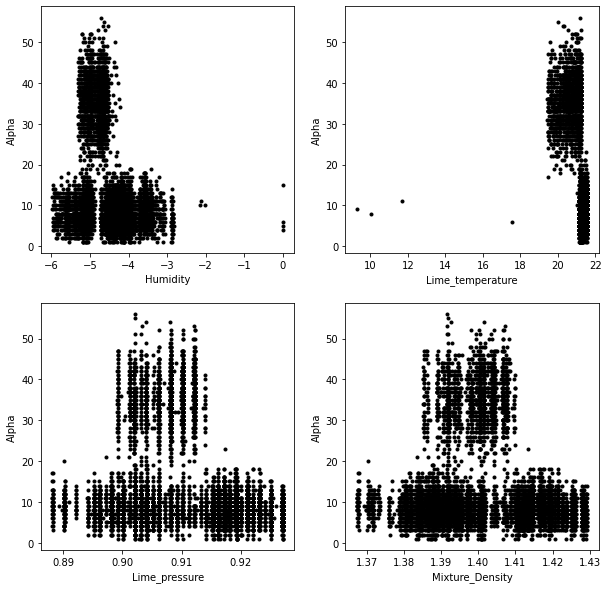

In [76]:
fig, ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(df.Humidity[(df.alpha>0) & (df.Humidity>-6)], df.alpha[(df.alpha>0) & (df.Humidity>-6)], 'k.')
ax[0,0].set_xlabel('Humidity')
ax[0,0].set_ylabel('Alpha')
ax[0,1].plot(df.Lime_temperature[(df.alpha>0) & (df.Lime_temperature>0)], df.alpha[(df.alpha>0) & (df.Lime_temperature>-0)], 'k.')
ax[0,1].set_xlabel('Lime_temperature')
ax[0,1].set_ylabel('Alpha')
ax[1,0].plot(df.Lime_pressure[(df.alpha>0) & (df.Lime_pressure>0)], df.alpha[(df.alpha>0) & (df.Lime_pressure>-0)], 'k.')
ax[1,0].set_xlabel('Lime_pressure')
ax[1,0].set_ylabel('Alpha')
ax[1,1].plot(df.Mixture_Density[(df.alpha>0) & (df.Mixture_Density>0)], df.alpha[(df.alpha>0) & (df.Mixture_Density>-0)], 'k.')
ax[1,1].set_xlabel('Mixture_Density')
ax[1,1].set_ylabel('Alpha')
plt.show()

Text(0, 0.5, 'nSc')

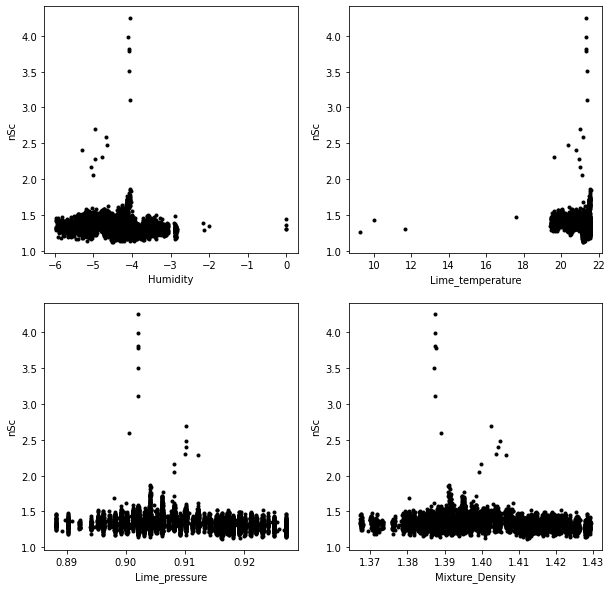

In [77]:
fig, ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(df.Humidity[(df.nSc>0) & (df.Humidity>-6)], df.nSc[(df.nSc>0) & (df.Humidity>-6)], 'k.')
ax[0,0].set_xlabel('Humidity')
ax[0,0].set_ylabel('nSc')
ax[0,1].plot(df.Lime_temperature[(df.nSc>0) & (df.Lime_temperature>0)], df.nSc[(df.nSc>0) & (df.Lime_temperature>-0)], 'k.')
ax[0,1].set_xlabel('Lime_temperature')
ax[0,1].set_ylabel('nSc')
ax[1,0].plot(df.Lime_pressure[(df.nSc>0) & (df.Lime_pressure>0)], df.nSc[(df.nSc>0) & (df.Lime_pressure>-0)], 'k.')
ax[1,0].set_xlabel('Lime_pressure')
ax[1,0].set_ylabel('nSc')
ax[1,1].plot(df.Mixture_Density[(df.nSc>0) & (df.Mixture_Density>0)], df.nSc[(df.nSc>0) & (df.Mixture_Density>-0)], 'k.')
ax[1,1].set_xlabel('Mixture_Density')
ax[1,1].set_ylabel('nSc')

Text(0, 0.5, 'Alpha')

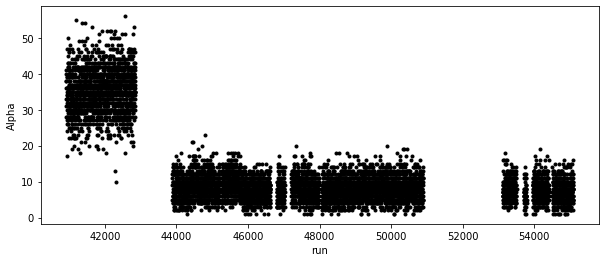

In [78]:
fig, ax=plt.subplots(1,figsize=(10,4))
plt.plot(df.run[(df.alpha>0)], df.alpha[(df.alpha>0)], 'k.')
plt.xlabel('run')
plt.ylabel('Alpha')

rate mu 3.62e-04
rate alpha 2.04e-02


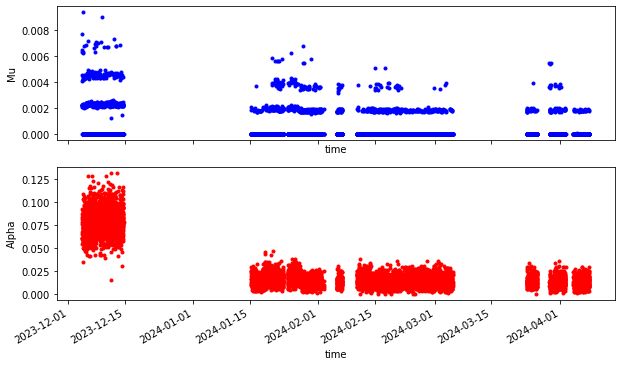

In [79]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
print('rate mu {:.2e}'.format(df.mu.sum()/df.live_time.sum()*0.9))
fig, ax=plt.subplots(2,1, figsize=(10,6))
fig.autofmt_xdate()
ax[0].plot(pd.to_datetime(df['epoch'],unit='s'), df.mu/(df.live_time*0.9), 'b.')

ax[0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Mu')
print('rate alpha {:.2e}'.format(df.alpha.sum()/df.live_time.sum()*0.9))
ax[1].plot(pd.to_datetime(df['epoch'],unit='s'), df.alpha/(df.live_time*0.9), 'r.')
ax[1].set_xlabel('time')
ax[1].set_ylabel('Alpha')
plt.show()

    arrivalDate        run         epoch  live_time   alpha     mu  \
0    2023-12-04  3605448.0  1.497505e+11    45197.0  3064.0   79.0   
1    2023-12-05  6537585.0  2.705826e+11    78673.0  5233.0   85.0   
2    2023-12-06  6650973.0  2.740000e+11    78158.0  5615.0   64.0   
3    2023-12-07  6474765.0  2.655042e+11    77265.0  5560.0  102.0   
4    2023-12-08  6588015.0  2.689217e+11    77712.0  5570.0   88.0   
..          ...        ...           ...        ...     ...    ...   
122  2024-04-04  3818347.0  1.198573e+11    43422.0   524.0    7.0   
123  2024-04-05  5958301.0  1.866430e+11    79000.0   785.0    8.0   
124  2024-04-06  7289497.0  2.277498e+11    81536.0   988.0   12.0   
125  2024-04-07  7145017.0  2.226239e+11    80625.0   879.0    6.0   
126  2024-04-08  2643144.0  8.220238e+10    28872.0   369.0    3.0   

            nSc  Lime_pressure  Atm_pressure  Lime_temperature  \
0    125.294080      80.225932     79.472161       1721.686797   
1    227.802441      81.640

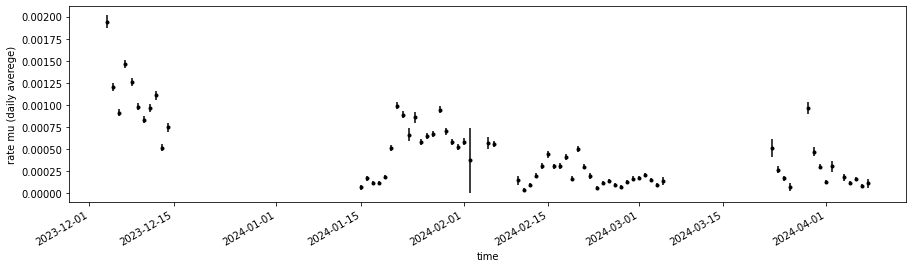

In [81]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
fig, ax = plt.subplots(figsize=(15,4))
fig.autofmt_xdate()
df['arrivalDate'] = pd.to_datetime(df.epoch, unit='s')
df1 = df.resample('D', on='arrivalDate').sum().dropna().reset_index() #W per settimane ecc.
df1['rate_mu']=(df1.mu/(df1.live_time*0.9))
print (df1)
cut = (df1['arrivalDate']>'2022-01-10') & (df1['arrivalDate']<'2024-05-15')
x=df1['arrivalDate'][cut]
y=df1['rate_mu'][cut]
e=df1['rate_mu']*np.sqrt(np.sqrt(df1['mu'])/df1['mu']**2+np.sqrt(df1['live_time'])/df1['live_time']**2)
e = e[cut]
ax.errorbar(x, y, yerr=e, fmt='k.')
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_xlabel('time')
ax.set_ylabel('rate mu (daily averege)')
plt.show()

In [ ]:
from IPython import display
import time
bins = 100
a = np.histogram(np.random.normal(bins/2, bins/20, bins), bins)[0]
gh = myHist(np.random.normal(10, 3, 10000), bins=100, range=(-10, +30))
x = np.array([x for x in range(bins)])
for i in range(100):
    a = myhist.fill(np.random.normal(10, 3, 10000))
    plt.figure(figsize=(4,4))
    plt.bar(x, a, width=1, label = str(i))
    plt.legend()

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

In [55]:
cut

0      False
1      False
2      False
3      False
4      False
       ...  
101     True
102     True
103     True
104     True
105     True
Name: arrivalDate, Length: 106, dtype: bool